# Hipotez

**Hipotez Testi** , bir inanışı(bir savı,bir tahmini vs)test etmek için kullanılan istatistiksel bir tekniktir.

Hipotezler H0 ve H1 olarak iki çeşittir.Fakat bu çeşitler kendi aralarında eşit-eşit değil,küçük eşit-büyük ve büyük eşit-küçük gibi türleri vardır.(Mü değeri)

**p-value :** Hipotez testlerinin sonu.larını değerlendirmek üzere programlar tarafından p-value değeri verilir.Bu değer üzerinden kolayca yorum yapabiliriz.Eğer p-value değeri p < 0.05 ise ilgili H0 hipotezini reddettiğimiz sonucuna varacağız.**Dağılım testlerinde** H0 reddedilmek istenilmez.Çünkü H0 "örnek dağılımı ile teorik dağılım arasında fark yoktur"der.

### Hipotez Testi Adımları

* Hipotezlerin kurulması ve yönünün belirlenmesi
* Anlamlılık düzeyinin ve tablo değerinin belirlenmesi (alfa = 0.05)
* Test istatistiğin belirlenmesi ve test istatistiğinin hesaplanması
* Hesaplanan test istatistiği ile alfa'ya karşılık gelen tablo değerinin karşılaştırılması (Test İstatistiği(Zh) > Tablo Değeri(Zt) ise H0 Red)
* Yorum

### Tek Örneklem T Testi : Test İstatistiği

**Popülasyon ortalaması ile varsayımsal bir değer arsında istatistiksel oalrak bir farklılık olup olmadığını test etmek için kullanılan parametrik bir testtir.**

* Anakütle standart sapması biliniyorsa z istatistiği kullanılır.
* Anakütle standart sapması bilinmiyorsa ve n > 30 ise z istatistiği kullanılır.
* Anakütle standart sapması bilinmiyor ve n < 30 ise t istatistiği kullanılır.

#### İş Uygulaması : Web Sitesinden Geçirilen Sürenin Testi

* **Problem:**Web sitemizde geçirilen ortalama süre gerçekten 170 saniye mi?
* **Detaylar**:
* Yazılımlardan elde edilen web sitesinde geçirilen ortalama süreler var.
* Bu veriler incelendiğinde bir yönetici ya da çalışan bu değerlerin böyle olmadığına yönelik düşünceler taşıyor ve bu durumu test etmek istiyor.

    H0 : mü = 170
    H1 : mü =! 170    

In [5]:
import numpy as np
olcumler = np.array([17,160,234,149,145,102,197,75,201,225,211,119,
                    157,145,127,244,163,114,145,65,112,185,202,146,
                    203,224,203,114,188,156,187,154,177,95,165,50,110,
                    216,138,151,166,135,155,84,251,173,131,207,121,120])

In [3]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 102, 197,  75, 201, 225])

In [6]:
import scipy.stats as stats

In [7]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.28, variance=2588.2057142857143, skewness=-0.32197251442617536, kurtosis=-0.07641341812828983)

In [7]:
#Varsayım Kontrolü
#Normallik Varsayımı

In [8]:
#histogram
import pandas as pd
pd.DataFrame(olcumler).plot.hist() ;

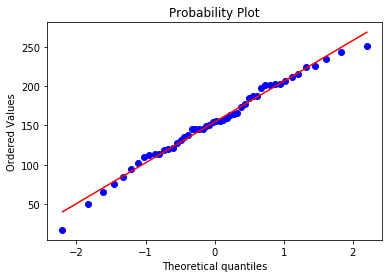

In [14]:
#qqplot
import pylab
stats.probplot(olcumler, dist="norm", plot = pylab)
pylab.show()

In [15]:
#Shapiro-Wilks Testi

H0 : Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık yoktur.
    
H1 : Örnek dağılımı ile teorik normal dağılım arasında istatistiksel olarak anlamlı bir farklılık vardır.

In [9]:
from scipy.stats import shapiro

In [10]:
shapiro(olcumler)

(0.9858638048171997, 0.8080224990844727)

Sol taraftaki değer **test istatistiğini**,sağ taraftaki değer ise **p-value**

In [11]:
print("T Hesap İstatistiği : " + str(shapiro(olcumler)[0]))
print("Hesaplanan P-Value : " + str(shapiro(olcumler)[1]))

T Hesap İstatistiği : 0.9858638048171997
Hesaplanan P-Value : 0.8080224990844727


In [22]:
#Hipotez Testinin Uygulanması

In [12]:
stats.ttest_1samp(olcumler, popmean = 170)

Ttest_1sampResult(statistic=-2.184933120498087, pvalue=0.03370564901336303)

H0 : Web sitemizde geçirilen süre 170 saniyedir.

H1 : Web sitemizde geçirilen süre 170 saniye değildir.

Test sonuçları incelendiğinde p-value değeri çalışmanın başında kabul ettiğmiz alfa yani 0.05 değerinden küçük olduğundan dolayı **H0** hipotezimiz **reddedilir**.Bu şu anlama gelmektedir ; web sitemizde geçirilen ortalama süre 170 saniye değildir.

### Nonparametrik Tek Örneklem Testi

In [13]:
from statsmodels.stats.descriptivestats import sign_test

In [25]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227219)

### Tek Örneklem Oran Testi

**Oransal bir ifade test edilmek istenildiğinde kullanılır.**

#### İş Uygulaması : Dönüşüm Oranı Testi

**Problem**:Bir yazılım ile bir mecrada reklam verilmiş ve bu reklama ilişkin yazılım tarafında 0.125 dönüşüm oranı elde edidiği ifade edilmiştir.Fakat bu durum kontrol edilmek isteniyor.Çünkü bu yüksek bir oran ve gelirler incelendiğinde örtüşme görülmüyor.

**Detaylar**:
* 500 kişi dış mecrada reklama tıklamış ,40 tanesi sitemize gelip alışveriş yapmış
* Örnek üzerinden elde edilen dönüşüm oranı : 40 / 500 = 0,08

H0 : P = 0.125

H1 : P != 0.125

In [14]:
from statsmodels.stats.proportion import proportions_ztest

In [15]:
count = 40
nobs = 500 
value = 0.125

In [16]:
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

### Bağımsız İki Örneklem T Testi

İki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.Daha karmaşık tanımı ise,elimizde gerçek değerlerini bilmediğimiz iki anakitle parametresi(ortalamaları) var.Bu ortalamaların birbirinden farkını karşılaştırıyoruz.AB testi olarakta isimlendirilir. Örnek sayısına ve varyansların homejen olup olmadığna göre farklılık gösteren formül hesaplamaları vardır.

**Varsayımlar**
* Normallik
* Varyans Homojenliği

**Normallik testini** görsel yada hipotez tezleri yardımıyla yapabiliyoruz.qqplot ve histogram yada Shapiro-Wilks

**Varyans Homejenliği**,grupların varyanslarının birbirine benzer olmasını ifade ediyor.

#### İş Uygulaması : ML (Machine Learning) Modelinin Başarı Testi (AB Testi)

**Problem:** Bir ML projesine yatırım yapılmış.Ürettiği tahminler neticesinde oluşan gelir ile eski sistemin ürettiği gelirler karşılaştırılıp anlamlı farklılık olup olmadığı tes edilmek isteniyor.

**Detaylar:**
* Model geliştirilmiş ve web sitesine entegre edilmiş.
* Site kullanıcıları belirli bir kurala göre ikiye bölünmüş ve A eski grubu B yeni sistem

**Test:** Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor.

H0 : mü1 = mü2
    
H1 : mü1 != mü2    

In [33]:
#Veri Tipi I

In [17]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

In [18]:
A_B = pd.concat([A,B], axis=1)
A_B.columns = ["A","B"]

In [19]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [37]:
#Veri Tipi II

In [20]:
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,32,33,33,33,31,32,33,26,32,33,29])

In [21]:
GRUP_A = np.arange(len(A))
GRUP_A = pd.DataFrame(GRUP_A)
GRUP_A [:] = "A"
A = pd.concat([A, GRUP_A], axis = 1)

In [23]:
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B [:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

In [24]:
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


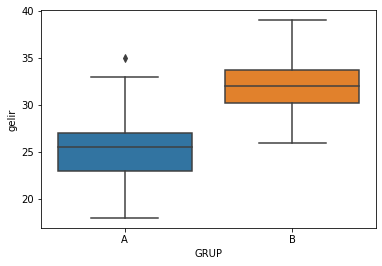

In [25]:
import seaborn as sns
sns.boxplot(x = "GRUP", y ="gelir", data = AB);

#### Varsayım Kontrolü

In [44]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [45]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


In [46]:
# Normallik Varsayımı

In [26]:
from scipy.stats import shapiro

In [27]:
shapiro(A_B.A)

(0.9789242148399353, 0.7962799668312073)

In [28]:
shapiro(A_B.B)

(0.9561260342597961, 0.24584221839904785)

In [50]:
# Varyans Homojenliği Varsayımı

H0 : Varyanslar homejen

H1 : Varyanslar homejen değil   
    

In [29]:
stats.levene(A_B.A,A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

In [53]:
# Hipotez Testi

In [30]:
stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [31]:
test_istatistigi, pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var = True)
print("Test İstatistiği = %.4f, p-değeri = %.4f" % (test_istatistigi,pvalue))

Test İstatistiği = -7.0287, p-değeri = 0.0000


**Sonuç Yorumlama :** Eski sistem,kullanıcıların bir ürün önerisi almadan ürünlerle karşılaşmasını, yeni sistem ise kullanıcıların geliştirilmiş bir makine öğrenme algoritmasını tahminlerine göre ürünlerle karşılaştırılmasını ifade ediyordu.H0 hipotezi bunların birbirine eşit olduğu söylüyor.p-value değeri incelendiğinde bu reddettiğimiz görülmektedir.Dolayısıyla eski sistem ile yeni sistem arasında istatistiki olarak anlamlı bir farklılık vardır.Bu fark yeni sistemin lehinedir.Yeni grubun ortalamasının daha fazla olduğu görülmektedir.  

### Bağımlı İki Örneklem T Testi

**Bağımlı iki grup ortalaması arasında karşılaştırma yapılmak istenildiğinde kullanılır.**

#### İş Uygulaması : Şirket İçi Eğitimin Performans Etkisi Ölçümü

**Problem:**Belirli uğraşlar sonucunda alınan bir eğitimin katma değer sağlayığ sağlamadığını ölçülmek isteniyor.

**Detaylar:**
* Bir departman bir konuda eğitim talep ediyor.
* Gerekli/gereksiz değerlendirmeler neticesinde eğitim alınıyor.
* Eğitimden önce ve sonra olacaka şekilde ölçümler yapılıyor.

**Test:**Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniyor.

H0 : Mü(öncesi) = Mü(sonrası)

H1 : Mü(öncesi) != Mü(sonrası)    

In [32]:
import pandas as pd
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
                      121,118,124,121,125,115,115,119,118,121,117,117,120,120,
                      121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
                       134,134,124,140,134,129,129,138,134,124,122,126,133,127,
                       130,130,130,132,117,130,125,129,133,120,127,123])

In [4]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [5]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [33]:
# BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(),"\n\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 




In [34]:
import numpy as np
#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME\
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



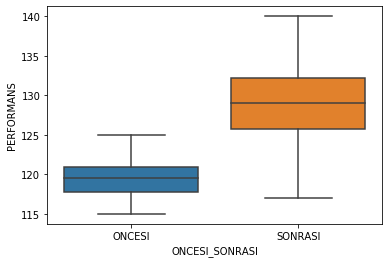

In [30]:
import seaborn as sns
sns.boxplot(x ="ONCESI_SONRASI", y ="PERFORMANS", data = BIRLIKTE) ;

In [31]:
#Varsayım Kontrolleri

In [35]:
from scipy.stats import shapiro

In [36]:
shapiro(AYRIK.ONCESI)

(0.9543656706809998, 0.10722451657056808)

In [37]:
shapiro(AYRIK.SONRASI)

(0.9780089259147644, 0.6159515380859375)

In [38]:
import scipy.stats as stats
stats.levene(AYRIK.ONCESI,AYRIK.SONRASI)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

In [36]:
#Hipotez Testi

In [39]:
stats.ttest_rel(AYRIK.ONCESI, AYRIK.SONRASI)

Ttest_relResult(statistic=-9.281533480429937, pvalue=2.0235251764440722e-11)

In [40]:
test_istatistigi, pvalue = stats.ttest_rel(AYRIK["ONCESI"],AYRIK["SONRASI"])
print("Test İstatistiği = %.4f, p-değeri = %.4f" % (test_istatistigi,pvalue))

Test İstatistiği = -9.2815, p-değeri = 0.0000


**Yorum :** H0 Hipotezi Mü(öncesi) ve Mü(sonrası) birbirine eşittir.Öncesi ve sonrası arasında istatistiki olarak anlamlı bir farklılık yoktur.(Çalışanlara eğitim vermeden önceki performanslarıyla eğitim aldıktan sonraki performansları karşılatırıldığında bu performanslar arası istatistiki olarak anlamlı bir fark yoktur.) P-value değeri incelendiğinde 0.0000 olduğundan dolayı yani alfa değerimiz olan 0.05 ten küçük olduğundan H0 hipotezi reddedilir.Bu da eğitimin işe yaradığının göstergesidir.Bilimsel olarakta ortaya güvenli bir şekilde eğitimin performsa katkı sağlamıştır.

### Nonparametrik Bağımlı İki Örneklem Testi

In [41]:
import scipy.stats as stats
stats.wilcoxon(AYRIK.ONCESI, AYRIK.SONRASI)

WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [42]:
test_istatistigi, pvalue = stats.wilcoxon(AYRIK["ONCESI"], AYRIK["SONRASI"])
print("Test İstatistiği = %.4f, p-değeri = %.4f" % (test_istatistigi,pvalue))

Test İstatistiği = 15.0000, p-değeri = 0.0000


### İki Örneklem Oran Testi

**İki oran arasında karşılaştırma yapmak için kullanılır.**

#### İş Uygulaması : Kullanıcı Arayüzü Deneyi (AB Testi)

**Hipotez :** 

H0 : P1 = P2
    
H1 : P1 != P2    

**Detaylar :**
    
Hemen Al Butonu :
    
Yeşil --> 1000 Görüntülenme,300 Tıklanma

Kırmızı --> 1100 Görüntülenme,250 Tıklama

In [43]:
from statsmodels.stats.proportion import proportions_ztest

In [44]:
import numpy as np
basari_sayisi = np.array([300,250])
gozlem_sayilari = np.array([1000,1100])

In [45]:
proportions_ztest(count = basari_sayisi, nobs = gozlem_sayilari)

(3.7857863233209255, 0.0001532232957772221)

### Varyans Analizi

Varyans Analizi kısmı çok geniş bir konudur.Biz sadece ikiden fazla grup olduğunda bu gruplar arasındaki farklılığı değerlendirmek adına bu analizi yapıyor olacağız.**Varyans analizi**,iki ya da daha fazla grup ortalaması arasında istatistiksel oalrak anlamlı bir farklılık olup olmadığı öğrenilmek istenildiğinde kullanılır.

**Hipotez :**
    
**H0** : mü1 = mü2 = mü3
    
**H1** : Eşit değillerdir (en az birisi farklıdır)

**Varsayımlar**
* Gözlemlerin birbirinden bağımsız olması(grupların)
* Normal Dağılım
* Varyans Homejenliği

#### İş Uygulaması : Anasayfa İçerik Stratejisi Belirleme

**Problem :** Anasayfada geçirilen süre artırılmak isteniyor.
    
**Detaylar :**
* Bir web sitesi için başarı kriterleri:ortalama ziyaret süresi,hemen çıkış oranı vb
* Uzun zaman geçiren kullanıcıların reklamlara daha fazla tıkladığı ve markaya olan bağlılıklarının arttığı biliniyor.
* Buna yönelik olarak benzer haberler farklı resimler ya da farklı formatlarda hazırlanarak oluşturulan test gruplarına gösteriliyor.
* A : Doğal Şekilde B:Yönlendirici C:İlgi Çekici

In [47]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B= pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

dfs = [A, B, C]

ABC = pd.concat(dfs,axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


In [48]:
#Varsayım Kontrolü

In [49]:
#Normallik

In [50]:
from scipy.stats import shapiro

In [51]:
shapiro(ABC["GRUP_A"])

(0.969743549823761, 0.5321813225746155)

In [52]:
shapiro(ABC["GRUP_B"])

(0.9789854884147644, 0.7979801297187805)

In [54]:
shapiro(ABC["GRUP_C"])

(0.9579201340675354, 0.273820161819458)

In [59]:
#Varyans Homojenliği

In [58]:
stats.levene(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])

LeveneResult(statistic=1.0267403645055275, pvalue=0.36247110117417064)

In [60]:
#Hipotez Testi

In [61]:
from scipy.stats import f_oneway

In [62]:
f_oneway(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])

F_onewayResult(statistic=74.69278140730431, pvalue=1.3079050746811477e-19)

In [63]:
test_istatistigi, pvalue = stats.f_oneway(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])
print("Test İstatistiği = %.4f, p-değeri = %.4f" % (test_istatistigi,pvalue))

Test İstatistiği = 74.6928, p-değeri = 0.0000


**Yorumlama** : H0 hipotezi medya şirketi olarak haber portalından 3 farklı haber tarzı deniyorum ve bu 3 farklı grup arasında istatiktiksel olarak anlamlı bir farklılık yoktur demektedir.Fakat p-value değerini incelediğimizda kabul edilen alfa değerinden (0.05) küçük olduğundan dolayo **H0 hipotezi reddedilir** ve bu haber içerikleri arasında istatistiksel olarak anlamlı bir farklılık olduğu görünmektedir.

In [64]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


Gözlenilene göre C grubu ilgi çekiciği içeriğine sahip olduğundan diğerlerine göre daha fazla geçirilen süreye sahiptir.

In [65]:
#NonParametrik Hipotez Testi

In [66]:
from scipy.stats import kruskal

In [67]:
kruskal(ABC["GRUP_A"], ABC["GRUP_B"], ABC["GRUP_C"])

KruskalResult(statistic=54.19819735523783, pvalue=1.7022015426175926e-12)

### Korelasyon Analizi

**Değişkenler arasındaki ilişki , bu ilişkinin yönü ve şiddeti ile ilgili bilgiler sağlayan istatistiksel bör yöntemdir.**

**Hipotezler:**
    
**H0** : ro(p) = 0

**H1** : ro(p) != 0

**Varsayımlar:**
* İki değişken içinde normallik varsayımı
* Varsayım sağlanıyorsa Pearson Korelasyon Katsayısı
* Varsayım sağlanmıyorsa Spearman Korelasyon Katsayısı

#### İş Uygulaması : Bahşiş ile Ödenen Hesap Arasındaki İlişkinin İncelenmesi

**Hipotez:**
    
**H0** : ro(p) = 0

**H1** : ro(p) != 0  

Bahşiş ile ödenen hesap arasında korelasyon var mı ?

In [71]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [72]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [73]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


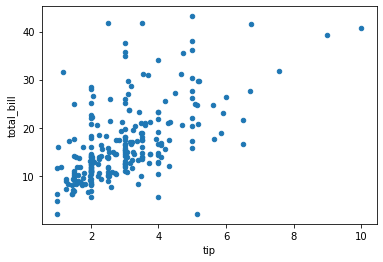

In [74]:
df.plot.scatter("tip","total_bill");

In [75]:
#Varsayımlar

In [76]:
from scipy.stats import shapiro

In [78]:
test_istatistigi, pvalue = shapiro(df["tip"])
print("Test İstatistiği = %.4f, p-değeri = %.4f" % (test_istatistigi,pvalue))

test_istatistigi, pvalue = shapiro(df["total_bill"])
print("Test İstatistiği = %.4f, p-değeri = %.4f" % (test_istatistigi,pvalue))

Test İstatistiği = 0.8978, p-değeri = 0.0000
Test İstatistiği = 0.9136, p-değeri = 0.0000


In [80]:
#Hipotez Testi

In [81]:
#Korelasyon Katsayısı:

In [82]:
df["tip"].corr(df["total_bill"])

0.5766634471096381

In [83]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

In [84]:
#Korelasyon Anlamlılığın Testi

In [85]:
from scipy.stats.stats import pearsonr

In [94]:
test_istatistigi, pvalue = pearsonr(df["tip"], df["total_bill"])
print("Korelasyon Katsayısı = %.4f, p-değeri = %.4f" % (test_istatistigi,pvalue))

Korelasyon Katsayısı = 0.5767, p-değeri = 0.0000


In [88]:
#NonParametrik Korelasyon Testi

In [90]:
from scipy.stats import stats
stats.spearmanr(df["tip"], df["total_bill"])

SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)

In [93]:
test_istatistigi, pvalue = stats.spearmanr(df["tip"], df["total_bill"])
print("Korelasyon Katsayısı = %.4f, p-değeri = %.4f" % (test_istatistigi,pvalue))

Korelasyon Katsayısı = 0.5937, p-değeri = 0.0000


**Yorumlama :** H0 hipotezine göre değişkenler arasında anlamlı bir korelasyon yoktur hipotezi p-value değeri çalışma başında kabul ettiğimiz alfa değeri olan 0.05'ten küçük olduğundan dolayı **H0 hipotezi reddedilmiştir** ve değişkenler arasında istatistiksel olarak anlamlı bir korelasyon vardır.Bu ilişki pozitif yönlüdür ve orta şiddete sahiptir.(0.5937)

In [95]:
test_istatistigi, pvalue = stats.kendalltau(df["tip"], df["total_bill"])
print("Korelasyon Katsayısı = %.4f, p-değeri = %.4f" % (test_istatistigi,pvalue))

Korelasyon Katsayısı = 0.4401, p-değeri = 0.0000
